<a href="INSERT_colab_R_link" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

label: exercise_1_a_vi

# Exercise 1 (a - vi): Soft Thresholding Operator
$$\theta^*_j =\begin{cases}
    \frac{\rho_j + \lambda}{z_j} & \text{ for } \rho_j < -\lambda\\
    0 & \text{ for }  -\lambda \leq \rho_j \leq \lambda\\
   \frac{\rho_j - \lambda}{z_j} & \text{ for } \rho_j > \lambda
\end{cases}$$

Plot $\theta^*_j$ as a function of $\rho_j$ for $\rho_j \in [-5, 5], \lambda = 1, z_j = 1.$ This function is called the soft thresholding operator.

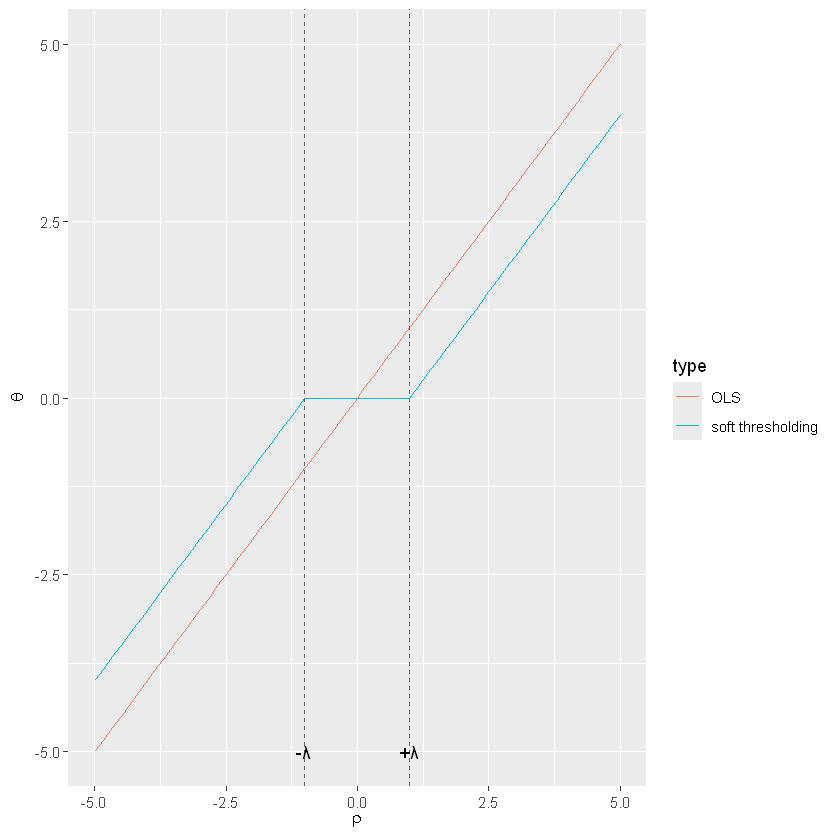

In [1]:
library(ggplot2)

rhos = seq(-5, 5, 0.1)
lambda = 1
z = 1
thetas_star = ifelse(rhos < -lambda, (rhos + lambda)/z,
                     ifelse(rhos > lambda, ((rhos - lambda)/z), 
                            0))
thetas = rhos/z
df = rbind(data.frame(theta = thetas_star, type="soft thresholding", rhos=rhos),
      data.frame(theta = thetas, type="OLS", rhos=rhos))

ggplot(df) +
    geom_line(aes(x=rhos, y=theta, color=type)) +
    ylab(expression(theta)) +
    xlab(expression(rho)) +
    geom_vline(xintercept = c(-1, 1), linetype = "dashed", color = "grey40") +
    annotate("text", x = -1, y = min(df$theta), label = "-λ") +
    annotate("text", x = 1, y = min(df$theta), label = "+λ")


label: soft_thresholding_plot_interpretation

## Interpretation of the Soft Thresholding Operator
As we can see from the plot the coefficient $\theta^*_j$ is equal to zero when $\rho_j$ is between $-\lambda$ and $\lambda$, and therefore performs feature selection.

label: lasso_vs_projected_exercise
# Exercise 1 (d): Lasso vs. Projected Lasso Comparison

You are given the code below to compare the quality of the projected Lasso regression vs. the regular Lasso regression.

Complete the missing code of the algorithms and interpret the result.

In [ ]:
#| label: lasso_vs_projected_exercise_code
library(matlib)
library(ggplot2)
set.seed(2)

proj_orth_lasso <- function(X, y, lambda){
    # compute X_tilde

  
    X_tilde = # TODO
  
    # compute analytical solution for X_tilde

    theta_star = # TODO
    return(c(theta_star))
}

lasso <- function(X, y, lambda, N){
    p = ncol(X)
    theta = rep(1.0, p)
    for(i in seq(N)){
        j = (i %% p)+1
    
        rho_j = # TODO
        z_j = # TODO
    
        theta[j] = # TODO
    }
    return(theta)
}

# ----------- No need to make changes in the code below -----------

# Bessel corrected Root Mean Square Error (RMSE)
corrected_rmses = data.frame(rmse = numeric(), projected = factor()) # 

p = 10  # Num coefficients
n = 100 # Num samples

num_optim_steps = 400 # Coord updates for lasso

sigma_noise  = 0.1
sigma_signal = 1.0

lambda = 1 # L1 penalty

num_reruns = 100 # Monte Carlo reruns

for(i in seq(num_reruns)){
    X = matrix(rnorm(n*p, sd=sigma_signal), nrow=n)

    theta_true = rnorm(p)
    # Randomly setting ~70% of coefficients to zero
    idx = rbinom(p, 1, 0.7)
    theta_true[which(idx == 1)] = 0
  
    # Linear signal plus Gaussian noise
    y = X %*% theta_true + rnorm(n, sd=sigma_noise) 
  
    theta_proj_lasso = proj_orth_lasso(X, y, lambda)
    theta_regular_lasso = lasso(X, y, lambda, num_optim_steps)

    corrected_rmses_proj_lasso    = n/(n-1)*sd(theta_proj_lasso - theta_true)
    corrected_rmses_regular_lasso = n/(n-1)*sd(theta_regular_lasso - theta_true)

    corrected_rmses = rbind(
        corrected_rmses, 
        data.frame(rmse=corrected_rmses_proj_lasso), 
        projected=factor("yes", levels=c("yes", "no"))
        )

    corrected_rmses = rbind(
        corrected_rmses, 
        data.frame(rmse=corrected_rmses_regular_lasso), 
        projected=factor("no", levels=c("yes", "no"))
        )
}

ggplot(rmses) +
    geom_boxplot(aes(y = rmse, fill = projected)) +
    ylab(expression(sqrt(Sigma~(hat(theta)[j]-theta["j,true"])^2/p)))

label: lasso_vs_projected_solution
## Solution

In [57]:
#| label: installing_packages
# you'll need to install the following packages if you haven't done so already
install.packages("matlib")
install.packages("ggplot2")

Warning message:
"package 'matlib' is in use and will not be installed"
Warning message:
"package 'ggplot2' is in use and will not be installed"
Warning message:
"package 'ggplot2' is in use and will not be installed"


label: lasso_vs_projected_math_reminder

### Projected Orthogonal Lasso
Please refer to subexercises above for more details

Line 10 - Eigenvalue Decomposition: $\mathbf{X}^T \mathbf{X} = \mathbf{V} \mathbf{D} \mathbf{V}^T$

Line 13 - Transformation Matrix: $\mathbf{A} = \mathbf{V} \mathbf{D}^{-0.5}$

Line 14 - Transformed Design Matrix: $\tilde{\mathbf{X}} = \mathbf{X} \mathbf{A}$

Line 18 - OLS Solution in Projected Space : $\hat{\boldsymbol{\theta}}_{\text{OLS}} = \tilde{\mathbf{X}}^T \mathbf{y}$

Line 19-20 - Soft Thresholding in Projected Space: 
$$\hat{\boldsymbol{\theta}}_{\text{proj},j}^* = \begin{cases}
    \hat{\boldsymbol{\theta}}_{\text{OLS},j} - \lambda & \text{if } \hat{\boldsymbol{\theta}}_{\text{OLS},j} > \lambda \\
    0 & \text{if } |\hat{\boldsymbol{\theta}}_{\text{OLS},j}| \leq \lambda \\
    \hat{\boldsymbol{\theta}}_{\text{OLS},j} + \lambda & \text{if } \hat{\boldsymbol{\theta}}_{\text{OLS},j} < -\lambda
\end{cases}$$

Line 22 - Back-transformation to Original Space: $\boldsymbol{\theta}^* = \mathbf{A} \hat{\boldsymbol{\theta}}_{\text{proj}}^*$


In [ ]:
#| label: lasso_vs_projected_solution_code_proj_orth
library(matlib)
library(ggplot2)
set.seed(2)

# for a recap see subexercise b)
proj_orth_lasso <- function(X, y, lambda){ 
    # compute X_tilde
    # Decomposing X^T X = V D V^T (calculating eigenvalues and eigenvectors)
    eigen_v = eigen(t(X) %*% X) 

    # A = V D^{-0.5}; X_tilde = X A
    A = eigen_v$vectors %*% diag(eigen_v$values^(-0.5))
    X_tilde = X %*% A
  
    
    # compute analytical solution for X_tilde
    proj_theta_ols = t(X_tilde) %*% y
    proj_theta_star = sign(proj_theta_ols) * ifelse(abs(proj_theta_ols) - lambda > 0, 
                                                    abs(proj_theta_ols) - lambda, 0)
    
    theta_star = A %*% proj_theta_star
    return(c(theta_star))
}


label: lasso_coordinate_descent_math_reminder

### Coordinate Descent Lasso 
Please refer to subexercises above for more details


Line 15 - Partial Residual: $r^{(j)} = \mathbf{y} - \mathbf{X}_{-j} \boldsymbol{\theta}_{-j}$

Line 16 - Residual Correlation: $\rho_j = \mathbf{X}_j^T r^{(j)} = \sum\limits_{i=1}^n X_{ij} \left( y_i - \sum\limits_{k \neq j} X_{ik} \theta_k \right)$

Line 17 - Feature Norm Squared: $z_j = \|\mathbf{X}_j\|_2^2 = \sum\limits_{i=1}^n X_{ij}^2$

Line 19-20 - Soft Thresholding Update:
$$\theta_j^{(t+1)} = \begin{cases}
    \frac{\rho_j + \lambda}{z_j} & \text{if } \rho_j < -\lambda \\
    0 & \text{if } |\rho_j| \leq \lambda \\
    \frac{\rho_j - \lambda}{z_j} & \text{if } \rho_j > \lambda
\end{cases}$$

Please note that we avoid additional sum loops by vectorization in the implementation

In [4]:
#| label: lasso_vs_projected_solution_code_lasso
lasso <- function(X, y, lambda, N){
    p = ncol(X)
    theta = rep(1.0, p) # just constant initialization

    for(i in seq(N)){
        # Pick coordinate j in a cyclic order: 1, 2, ..., p, 1, 2, ...
        j = (i %% p)+1
        
        # We want mask theta so that it's zero only for j-th coordinate
        # This way we compute the partial residual: y - X (without j) * theta (without j) 
        mask = rep(1, p)
        mask[j] = 0.0
        
        partial_residual = y - X %*% (theta * mask)
        rho_j = X[,j] %*% partial_residual
        z_j = sum(X[,j]^2)
    
        theta[j] = ifelse(rho_j < -lambda, (rho_j + lambda)/z_j,
                   ifelse(rho_j > lambda,  (rho_j - lambda)/z_j, 0))
    }
    return(theta)
}

#| label: comparion
## Comparison of Lasso and Projected Lasso
The code below was provided in the exercise for comparing the 2 approaches in true parameter identification

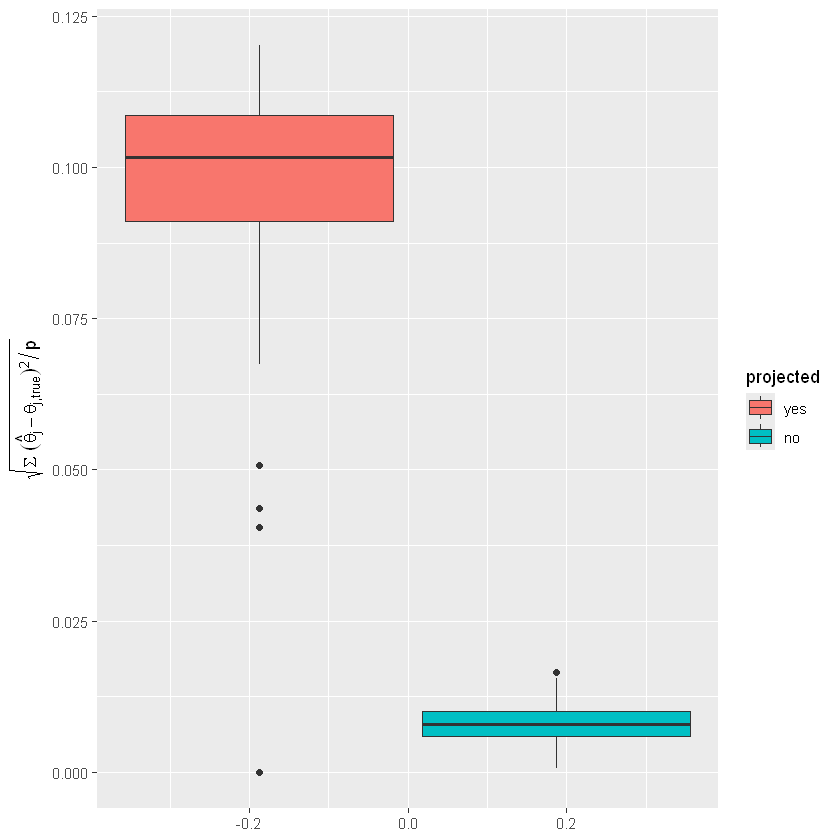

In [14]:
# | label: lasso_vs_projected_solution_code_comparison

# Bessel corrected Root Mean Square Error (RMSE)
corrected_rmses = data.frame(corrected_rmse = numeric(), projected = factor())

p = 10  # Num coefficients
n = 100 # Num samples

num_optim_steps = 400 # Coord updates for lasso

sigma_noise  = 0.1
sigma_signal = 1.0

lambda = 1 # L1 penalty

num_reruns = 100 # Monte Carlo reruns

for(i in seq(num_reruns)){
    X = matrix(rnorm(n*p, sd=sigma_signal), nrow=n)

    theta_true = rnorm(p)
    # Randomly setting ~70% of coefficients to zero
    idx = rbinom(p, 1, 0.7)
    theta_true[which(idx == 1)] = 0
  
    # Linear signal plus Gaussian noise
    y = X %*% theta_true + rnorm(n, sd=sigma_noise) 
  
    theta_proj_lasso = proj_orth_lasso(X, y, lambda)
    theta_regular_lasso = lasso(X, y, lambda, num_optim_steps)

    corrected_rmses_proj_lasso    = n/(n-1)*sd(theta_proj_lasso - theta_true)
    corrected_rmses_regular_lasso = n/(n-1)*sd(theta_regular_lasso - theta_true)

    corrected_rmses = rbind(
        corrected_rmses, 
        data.frame(corrected_rmse=corrected_rmses_proj_lasso, 
                   projected=factor("yes", levels=c("yes", "no")))
        )

    corrected_rmses = rbind(
        corrected_rmses, 
        data.frame(corrected_rmse=corrected_rmses_regular_lasso, 
                   projected=factor("no", levels=c("yes", "no")))
        )
}

ggplot(corrected_rmses) +
    geom_boxplot(aes(y = corrected_rmse, fill = projected)) +
    ylab(expression(sqrt(Sigma~(hat(theta)[j]-theta["j,true"])^2/p)))

label: lasso_vs_projected_interpretation
### Interpretation of Results

In this simulation, the true parameter vector is sparse in its original coordinate system. Hence, as expected, the regular Lasso regression outperforms the projected approach on average when identifying the true parameters in this scenario.